In [ ]:
# Giving the data set full_data_flightdelay.csv in the archive,
# the task is to predict the delay of a flight in minutes.
# The data set contains the following columns:
# MONTH:				Month
# DAY_OF_WEEK:			Day of Week
# DEP_DEL15: 			TARGET Binary of a departure delay over 15 minutes (1 is yes)
# DEP_TIME_BLK:			Departure time block
# DISTANCE_GROUP:			Distance group to be flown by departing aircraft
# SEGMENT_NUMBER:			The segment that this tail number is on for the day
# CONCURRENT_FLIGHTS:		Concurrent flights leaving from the airport in the same departure block
# NUMBER_OF_SEATS:		Number of seats on the aircraft
# CARRIER_NAME:			Carrier
# AIRPORT_FLIGHTS_MONTH:		Avg Airport Flights per Month
# AIRLINE_FLIGHTS_MONTH:		Avg Airline Flights per Month
# AIRLINE_AIRPORT_FLIGHTS_MONTH:	Avg Flights per month for Airline AND Airport
# AVG_MONTHLY_PASS_AIRPORT:	Avg Passengers for the departing airport for the month
# AVG_MONTHLY_PASS_AIRLINE:	Avg Passengers for airline for month
# FLT_ATTENDANTS_PER_PASS:	Flight attendants per passenger for airline
# GROUND_SERV_PER_PASS:		Ground service employees (service desk) per passenger for airline
# PLANE_AGE:			Age of departing aircraft
# DEPARTING_AIRPORT:		Departing Airport
# LATITUDE:			Latitude of departing airport
# LONGITUDE:			Longitude of departing airport
# PREVIOUS_AIRPORT:		Previous airport that aircraft departed from
# PRCP:				Inches of precipitation for day
# SNOW:				Inches of snowfall for day
# SNWD:				Inches of snow on ground for day
# TMAX:				Max temperature for day
# AWND:				Max wind speed for day



# Build a classification model using various supervised machine and unsupervised machine learning models
# learning models and check which model gives you the best accuracy

# use the following models for supervised machine learning
# 1. Logistic Regression
# 2. Decision Tree
# 3. GaussianNB
# 4. MLPClassifie

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = 'D:\\flight delay\\2019_with_weather (1)\\full_data_flightdelay.csv'

In [3]:
# importing the dataset
df = pd.read_csv(path)

# checking the dataset
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [4]:
df.shape

(6489062, 26)

In [4]:
# encode the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def clean_labels_encoder(list_of_labels, df):
    for label in list_of_labels:
        df[label] = le.fit_transform(df[label])
    return df

# clean the labels
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']
df = clean_labels_encoder(list_of_labels, df)

# show head of the dataset
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,3,2,1,25,143,14,13056,...,8,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
1,1,7,0,2,7,1,29,191,6,13056,...,3,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
2,1,7,0,1,7,1,27,199,6,13056,...,18,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
3,1,7,0,1,9,1,27,180,6,13056,...,2,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0,7,1,10,182,15,13056,...,1,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91


In [ ]:
summary = df.describe()
summary.to_csv("summary.csv")

In [7]:
# fill the missing values with mean
df.fillna(df.mean(), inplace=True)

df.corr()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
MONTH,1.000000,0.006727,-0.019049,-0.000650,-0.002561,0.016712,0.022951,0.003155,0.000090,0.036913,...,-0.017344,0.000293,0.012913,-0.004548,-0.003549,-0.005133,-0.053596,-0.088596,0.173454,-0.119272
DAY_OF_WEEK,0.006727,1.000000,-0.000199,0.005468,0.013550,-0.029812,-0.027214,0.009300,-0.001988,-0.001725,...,-0.005785,0.003262,-0.011503,-0.006120,0.005966,0.018205,-0.005883,-0.009878,0.007513,0.001785
DEP_DEL15,-0.019049,-0.000199,1.000000,0.167281,0.016289,0.117528,0.009028,0.011845,0.016082,0.026740,...,0.006220,-0.007315,0.000490,0.027097,-0.013342,0.080277,0.050156,0.026129,-0.008936,0.050947
DEP_TIME_BLK,-0.000650,0.005468,0.167281,1.000000,-0.026919,0.743527,0.055996,-0.021984,0.012839,0.107640,...,0.008759,-0.042453,-0.035409,-0.004765,-0.081345,-0.005099,-0.005931,-0.004901,0.017053,0.004311
DISTANCE_GROUP,-0.002561,0.013550,0.016289,-0.026919,1.000000,-0.237415,-0.035572,0.447485,-0.054989,-0.013700,...,-0.138314,0.104267,-0.011182,-0.159929,0.081160,-0.012478,-0.000485,-0.007388,0.003697,0.023392
SEGMENT_NUMBER,0.016712,-0.029812,0.117528,0.743527,-0.237415,1.000000,0.014240,-0.202832,0.075980,0.042633,...,0.076003,-0.036197,-0.034347,-0.070426,-0.125193,-0.016279,-0.014711,-0.006888,0.029219,-0.024107
CONCURRENT_FLIGHTS,0.022951,-0.027214,0.009028,0.055996,-0.035572,0.014240,1.000000,-0.054131,-0.132342,0.849023,...,0.036077,-0.364696,0.018230,0.118662,0.009078,-0.015074,-0.017250,-0.027321,0.026031,0.059272
NUMBER_OF_SEATS,0.003155,0.009300,0.011845,-0.021984,0.447485,-0.202832,-0.054131,1.000000,-0.049387,0.003574,...,-0.102969,0.058096,-0.136366,-0.161854,0.051274,-0.014044,-0.008511,-0.015707,0.061254,-0.018506
CARRIER_NAME,0.000090,-0.001988,0.016082,0.012839,-0.054989,0.075980,-0.132342,-0.049387,1.000000,-0.134015,...,0.043921,0.126469,-0.021838,-0.057003,0.065909,-0.013202,0.012916,-0.002202,-0.000003,0.022458
AIRPORT_FLIGHTS_MONTH,0.036913,-0.001725,0.026740,0.107640,-0.013700,0.042633,0.849023,0.003574,-0.134015,1.000000,...,0.027185,-0.402696,0.019066,0.091296,0.011825,-0.010380,-0.009837,-0.032679,0.038819,0.071717


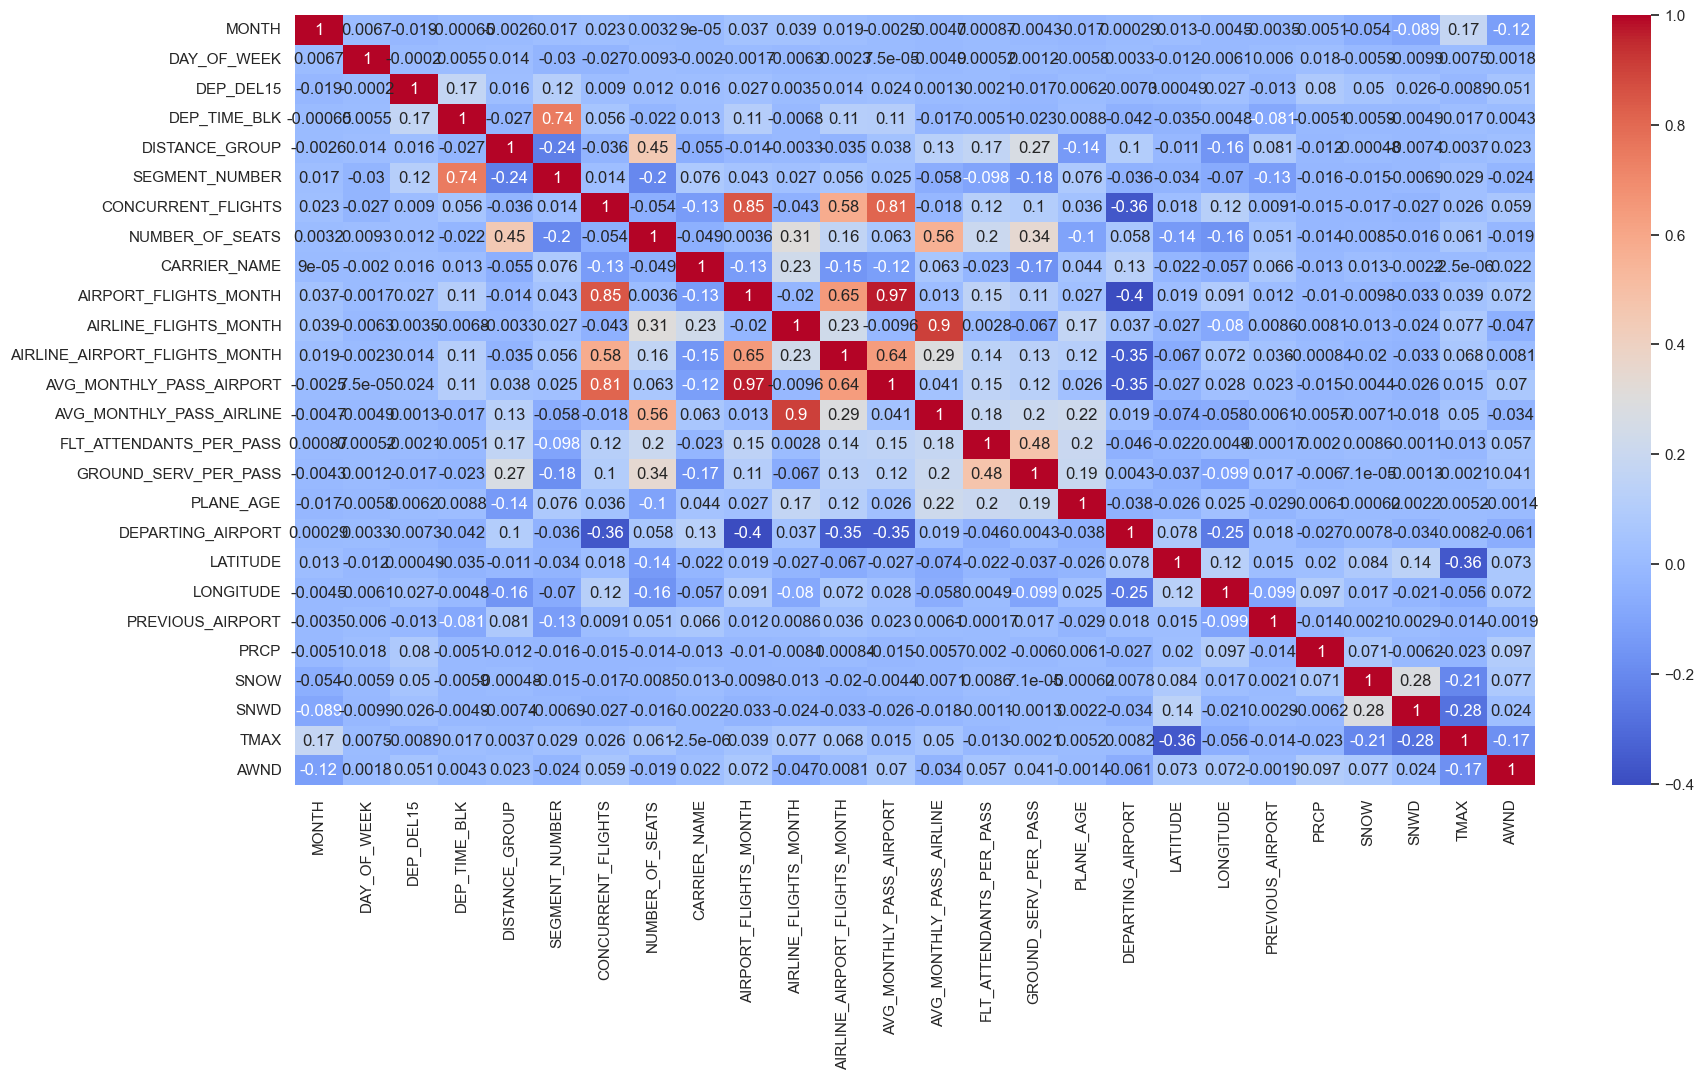

In [8]:
# show correlation in a heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# show the correlation in a plt figure
def show_correlation(df):
    plt.figure(figsize=(20, 10))
    sns.set(style='whitegrid', context='notebook')
    cols = [0, 1, 2]
    sns.heatmap(df.corr(), annot=True, square=False, cmap='coolwarm')
    plt.show()

# show the correlation
show_correlation(df)

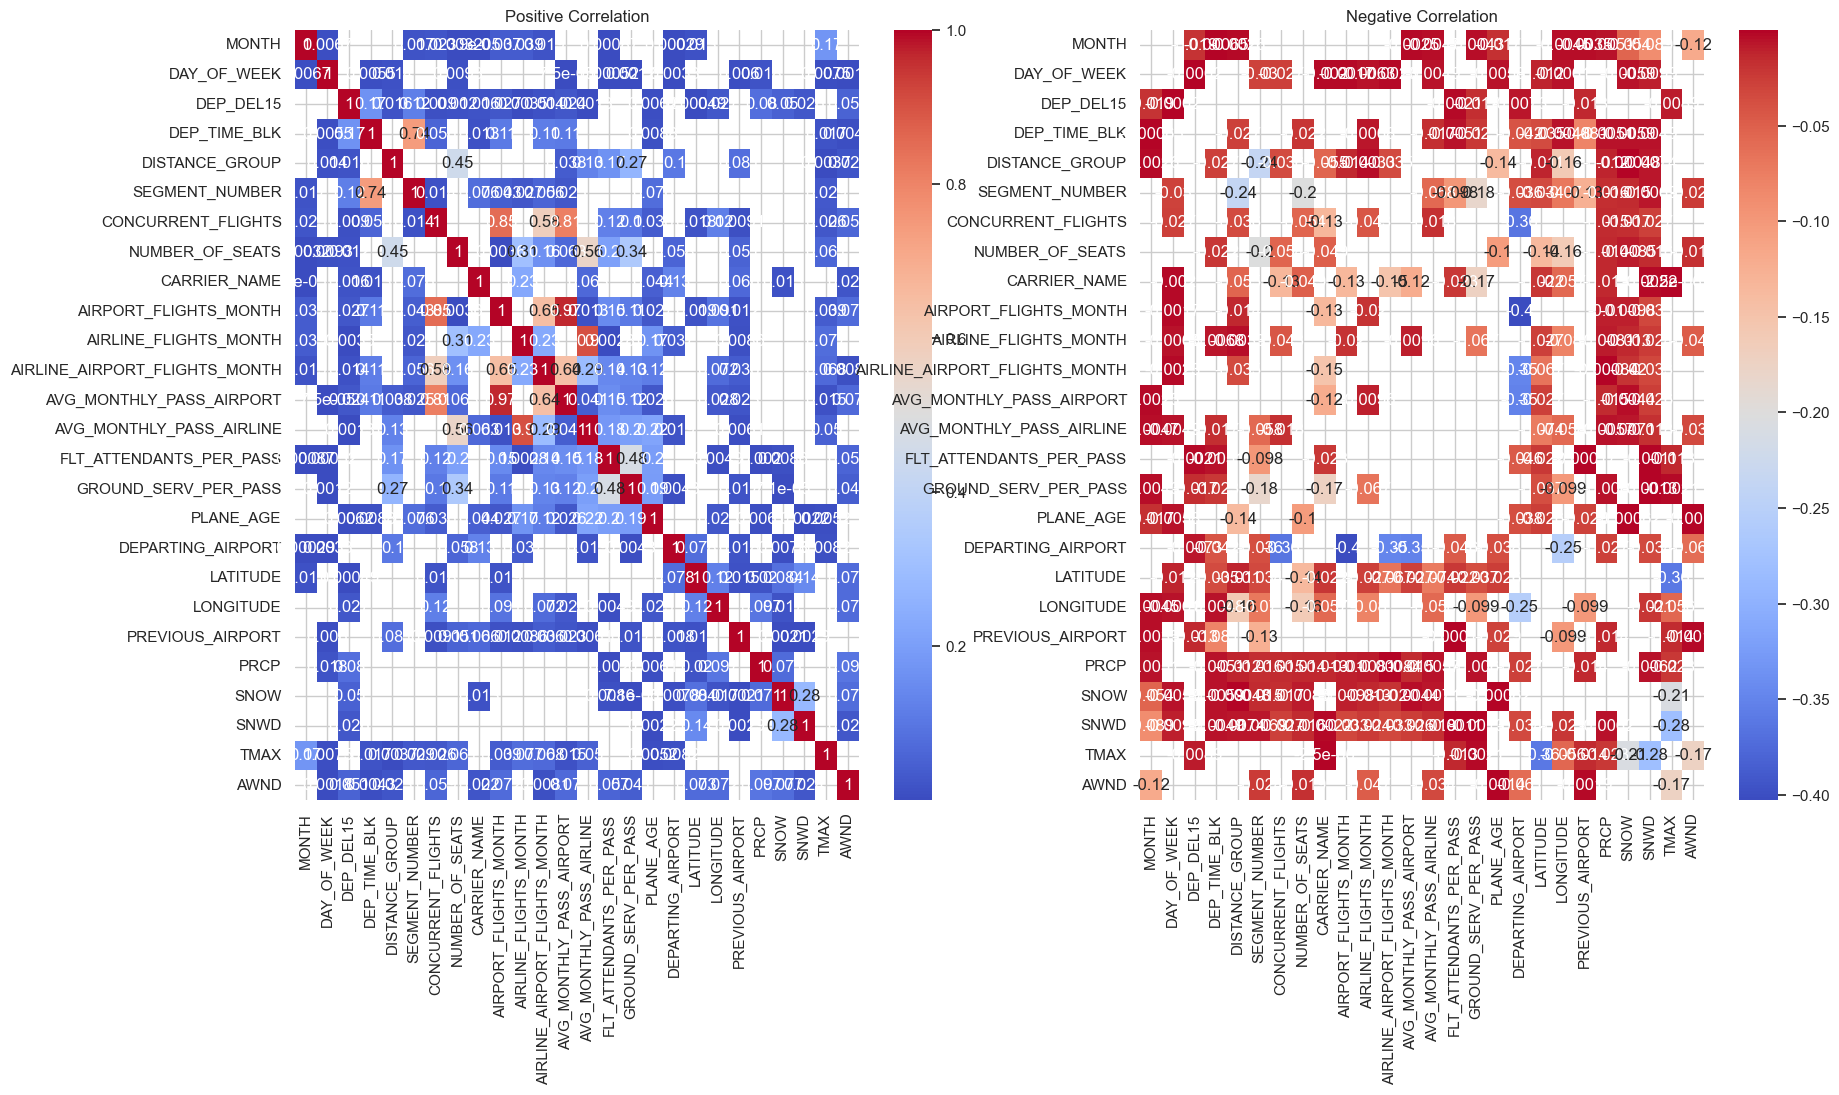

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# show correlation in a heatmap
def show_correlation(df):
    plt.figure(figsize=(20, 10))
    sns.set(style='whitegrid', context='notebook')
    
    # Compute the correlation matrix
    corr_matrix = df.corr()
    
    # Filter positive and negative correlations
    positive_corr = corr_matrix[corr_matrix > 0]
    negative_corr = corr_matrix[corr_matrix < 0]
    
    # Plot positive correlation
    plt.subplot(1, 2, 1)
    sns.heatmap(positive_corr, annot=True, cmap='coolwarm')
    plt.title('Positive Correlation')

    # Plot negative correlation
    plt.subplot(1, 2, 2)
    sns.heatmap(negative_corr, annot=True, cmap='coolwarm')
    plt.title('Negative Correlation')

    plt.show()

# show the correlation
show_correlation(df)


In [9]:
# split the data into features and target
# target is DEP_DEL15 therefore our prediction wwill be on this

X = df.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]].values
y = df.iloc[:, 2].values

X

array([[1.00e+00, 7.00e+00, 3.00e+00, ..., 2.16e+02, 0.00e+00, 0.00e+00],
       [1.00e+00, 7.00e+00, 2.00e+00, ..., 2.16e+02, 0.00e+00, 0.00e+00],
       [1.00e+00, 7.00e+00, 1.00e+00, ..., 2.16e+02, 0.00e+00, 0.00e+00],
       ...,
       [1.20e+01, 7.00e+00, 1.50e+01, ..., 1.36e+02, 6.00e-02, 0.00e+00],
       [1.20e+01, 7.00e+00, 1.60e+01, ..., 1.36e+02, 6.00e-02, 0.00e+00],
       [1.20e+01, 7.00e+00, 1.60e+01, ..., 1.36e+02, 6.00e-02, 0.00e+00]])

In [10]:
# covert the data into 0 - 1 range using minmax scaler

from sklearn.preprocessing import MinMaxScaler

def scale_data(X):
    scaler = MinMaxScaler()
    X_scaler = scaler.fit_transform(X)
    return X_scaler

X_scaler = scale_data(X)
df = pd.DataFrame(X_scaler)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.166667,0.1,0.0,0.222222,0.337884,0.8750,0.350041,0.907576,...,1.000000,0.177328,0.413609,0.25000,0.463158,0.412834,0.473453,0.608451,0.0,0.0
1,0.0,1.0,0.111111,0.6,0.0,0.259259,0.501706,0.3750,0.350041,0.605693,...,0.928515,0.413785,0.637931,0.09375,0.463158,0.412834,0.473453,0.608451,0.0,0.0
2,0.0,1.0,0.055556,0.6,0.0,0.240741,0.529010,0.3750,0.350041,0.605693,...,0.928515,0.413785,0.637931,0.56250,0.463158,0.412834,0.473453,0.608451,0.0,0.0
3,0.0,1.0,0.055556,0.8,0.0,0.240741,0.464164,0.3750,0.350041,0.605693,...,0.928515,0.413785,0.637931,0.06250,0.463158,0.412834,0.473453,0.608451,0.0,0.0
4,0.0,1.0,0.000000,0.6,0.0,0.083333,0.470990,0.9375,0.350041,0.084185,...,0.171586,0.026330,0.529709,0.03125,0.463158,0.412834,0.473453,0.608451,0.0,0.0


In [11]:
# split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(4542343, 22)
(4542343,)


In [ ]:
# Build a classification model using various supervised machine 
# learning models and check which model gives you the best accuracy

# use the following models
# 1. Logistic Regression
# 2. Decision Tree
# 3. GaussianNB
# 4. MLPClassifier

In [12]:
# create a function to train the models
# check the accuracy of the model
from sklearn.metrics import confusion_matrix, classification_report

def separator(count = 50):
    print('-'*count)

def train_model_and_print_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # score train and test sets
    scoreTest = model.score(X_train, y_train)
    scoreTrain = model.score(X_test, y_test)

    # predict the test data
    predict_test = model.predict(X_test)

    cm_result = confusion_matrix(y_test, predict_test)
    cr_result = classification_report(y_test,predict_test)

    model_name = str(model).split('(')[0]

    # print model name in blue color
    print('\033[1m' + model_name + '\033[0m')
    # print -----------------------------------
    separator()
    print('Train Score for '+str(model_name)+': ', (scoreTest))
    separator()
    print('Test Score for '+str(model_name)+': ', (scoreTrain))
    separator()
    print('Confusion Matrix for '+str(model_name)+' for test : \n', (cm_result))
    separator()
    print('Classification Report for '+str(model_name)+' for test : \n', str(cr_result))
    separator()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    # Predict the test data
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


LogisticRegression
--------------------------------------------------
Train Score for LogisticRegression:  0.8109598944861716
--------------------------------------------------
Test Score for LogisticRegression:  0.810741046858843
--------------------------------------------------
Confusion Matrix for LogisticRegression for test : 
 [[1574493    3786]
 [ 364648    3792]]
--------------------------------------------------
Classification Report for LogisticRegression for test : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90   1578279
           1       0.50      0.01      0.02    368440

    accuracy                           0.81   1946719
   macro avg       0.66      0.50      0.46   1946719
weighted avg       0.75      0.81      0.73   1946719

--------------------------------------------------


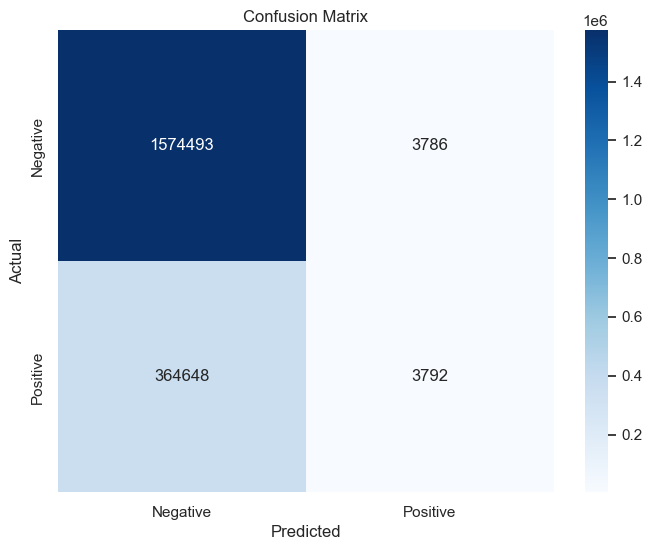

c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

DecisionTreeClassifier
--------------------------------------------------
Train Score for DecisionTreeClassifier:  0.8109063978655949
--------------------------------------------------
Test Score for DecisionTreeClassifier:  0.8107379647499202
--------------------------------------------------
Confusion Matrix for DecisionTreeClassifier for test : 
 [[1578279       0]
 [ 368440       0]]
--------------------------------------------------
Classification Report for DecisionTreeClassifier for test : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90   1578279
           1       0.00      0.00      0.00    368440

    accuracy                           0.81   1946719
   macro avg       0.41      0.50      0.45   1946719
weighted avg       0.66      0.81      0.73   1946719

--------------------------------------------------


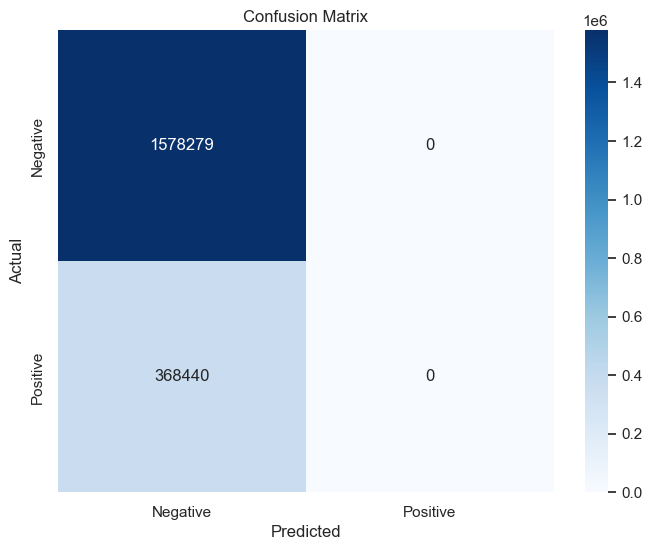

GaussianNB
--------------------------------------------------
Train Score for GaussianNB:  0.8003345410067008
--------------------------------------------------
Test Score for GaussianNB:  0.800157598502917
--------------------------------------------------
Confusion Matrix for GaussianNB for test : 
 [[1531109   47170]
 [ 341867   26573]]
--------------------------------------------------
Classification Report for GaussianNB for test : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89   1578279
           1       0.36      0.07      0.12    368440

    accuracy                           0.80   1946719
   macro avg       0.59      0.52      0.50   1946719
weighted avg       0.73      0.80      0.74   1946719

--------------------------------------------------


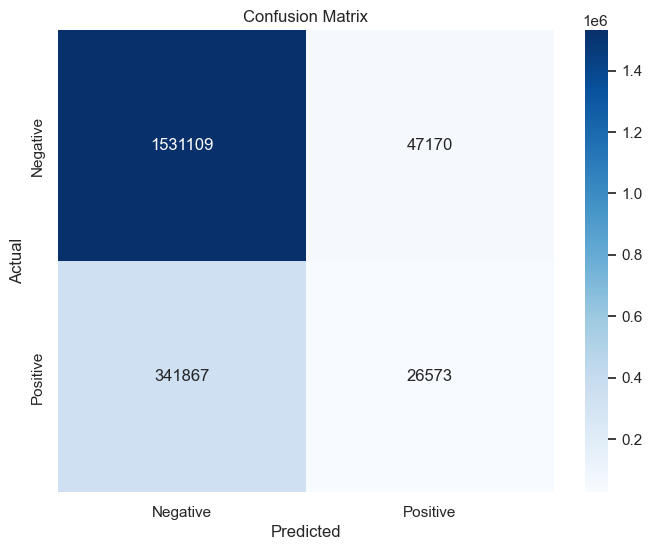

In [14]:
# using logistic regression
# 1. Logistic Regression
# 2. Decision Tree
# 3. GaussianNB
# 4. MLPClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=3)
gnb = GaussianNB()
#mlp = MLPClassifier(random_state=1, max_iter=300)

# train the models and print the accuracy
models = [log_reg, dt, gnb, ]

for model in models:
    train_model_and_print_accuracy(model, X_train, y_train, X_test, y_test)
    plot_confusion_matrix(model, X_test, y_test)

In [15]:


# Now use PCA to reduce the dimensionality of the data and
# retrain the models to see what impacts it has on your model in terms of accuracy.
# keep in mind that many times doing PCA can actually decrease the accuracy of your model
# but computation is much lighter and that's trade off you need to consider while build models in real life


In [16]:
# use PCA to reduce the dimensionality of the data

from sklearn.decomposition import PCA

pca = PCA(0.95)

x_pca = pca.fit_transform(X_scaler)

# Show the number of components
x_pca.shape

(6489062, 13)

In [17]:
# split the data into training and testing sets using the new data

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

************************* PCA *************************


c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

LogisticRegression
--------------------------------------------------
Train Score for LogisticRegression:  0.8109063978655949
--------------------------------------------------
Test Score for LogisticRegression:  0.8107379647499202
--------------------------------------------------
Confusion Matrix for LogisticRegression for test : 
 [[1578279       0]
 [ 368440       0]]
--------------------------------------------------
Classification Report for LogisticRegression for test : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90   1578279
           1       0.00      0.00      0.00    368440

    accuracy                           0.81   1946719
   macro avg       0.41      0.50      0.45   1946719
weighted avg       0.66      0.81      0.73   1946719

--------------------------------------------------


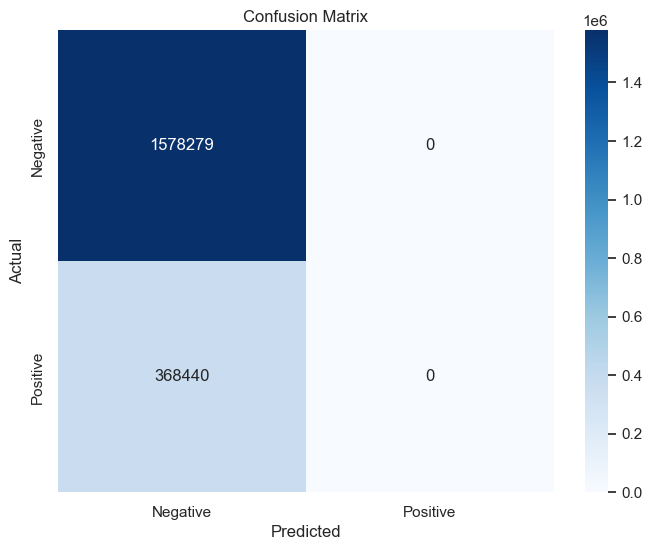

c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

DecisionTreeClassifier
--------------------------------------------------
Train Score for DecisionTreeClassifier:  0.8109063978655949
--------------------------------------------------
Test Score for DecisionTreeClassifier:  0.8107379647499202
--------------------------------------------------
Confusion Matrix for DecisionTreeClassifier for test : 
 [[1578279       0]
 [ 368440       0]]
--------------------------------------------------
Classification Report for DecisionTreeClassifier for test : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90   1578279
           1       0.00      0.00      0.00    368440

    accuracy                           0.81   1946719
   macro avg       0.41      0.50      0.45   1946719
weighted avg       0.66      0.81      0.73   1946719

--------------------------------------------------


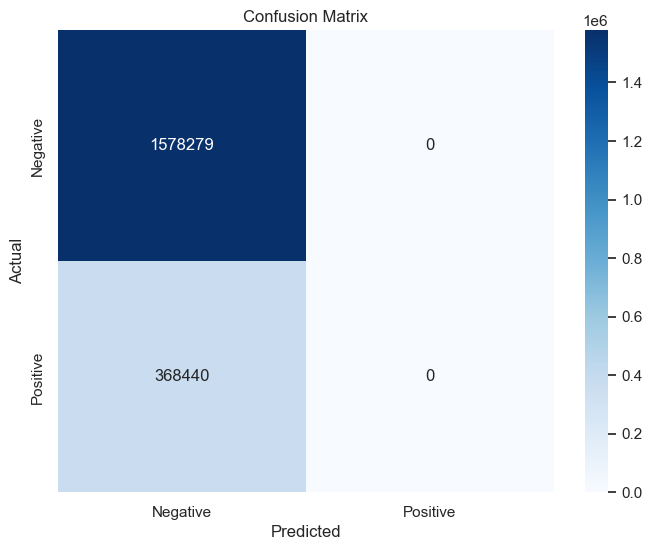

c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

GaussianNB
--------------------------------------------------
Train Score for GaussianNB:  0.8109063978655949
--------------------------------------------------
Test Score for GaussianNB:  0.8107379647499202
--------------------------------------------------
Confusion Matrix for GaussianNB for test : 
 [[1578279       0]
 [ 368440       0]]
--------------------------------------------------
Classification Report for GaussianNB for test : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90   1578279
           1       0.00      0.00      0.00    368440

    accuracy                           0.81   1946719
   macro avg       0.41      0.50      0.45   1946719
weighted avg       0.66      0.81      0.73   1946719

--------------------------------------------------


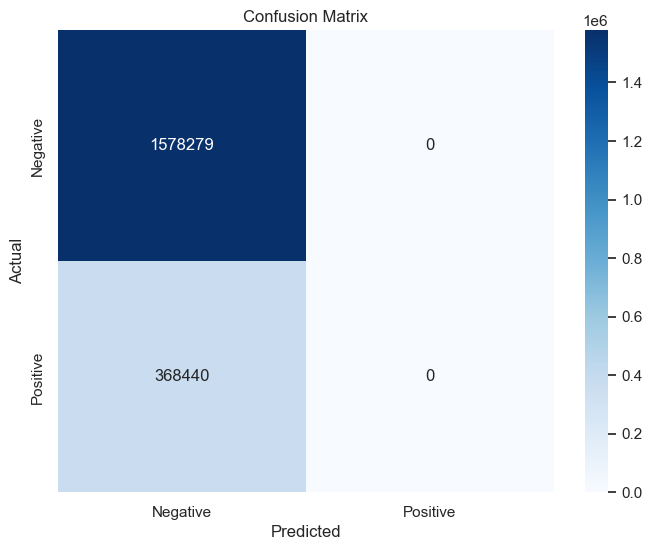

In [18]:
# now retrain the models
print('*'*25, 'PCA', '*'*25)
for model in models:
    train_model_and_print_accuracy(model, X_train, y_train, X_test, y_test)
    plot_confusion_matrix(model, X_test, y_test)

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    # Compute predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

LogisticRegression
--------------------------------------------------
Train Score for LogisticRegression:  0.8109063978655949
--------------------------------------------------
Test Score for LogisticRegression:  0.8107379647499202
--------------------------------------------------
Confusion Matrix for LogisticRegression for test : 
 [[1578279       0]
 [ 368440       0]]
--------------------------------------------------
Classification Report for LogisticRegression for test : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90   1578279
           1       0.00      0.00      0.00    368440

    accuracy                           0.81   1946719
   macro avg       0.41      0.50      0.45   1946719
weighted avg       0.66      0.81      0.73   1946719

--------------------------------------------------


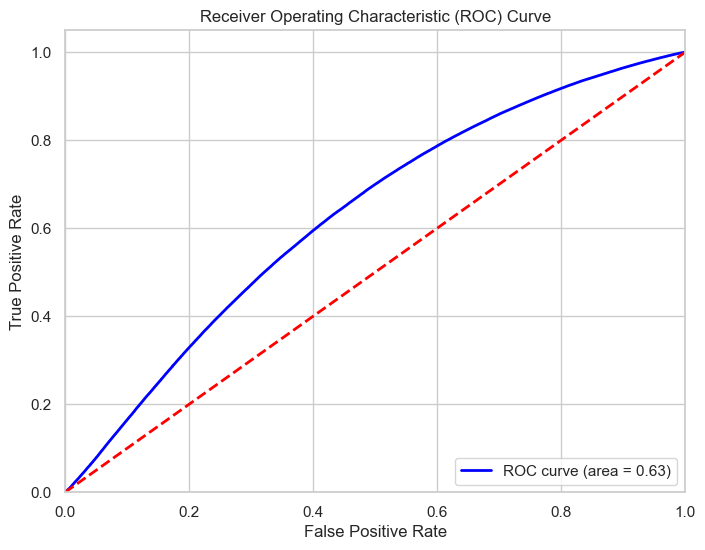

c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

DecisionTreeClassifier
--------------------------------------------------
Train Score for DecisionTreeClassifier:  0.8109063978655949
--------------------------------------------------
Test Score for DecisionTreeClassifier:  0.8107379647499202
--------------------------------------------------
Confusion Matrix for DecisionTreeClassifier for test : 
 [[1578279       0]
 [ 368440       0]]
--------------------------------------------------
Classification Report for DecisionTreeClassifier for test : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90   1578279
           1       0.00      0.00      0.00    368440

    accuracy                           0.81   1946719
   macro avg       0.41      0.50      0.45   1946719
weighted avg       0.66      0.81      0.73   1946719

--------------------------------------------------


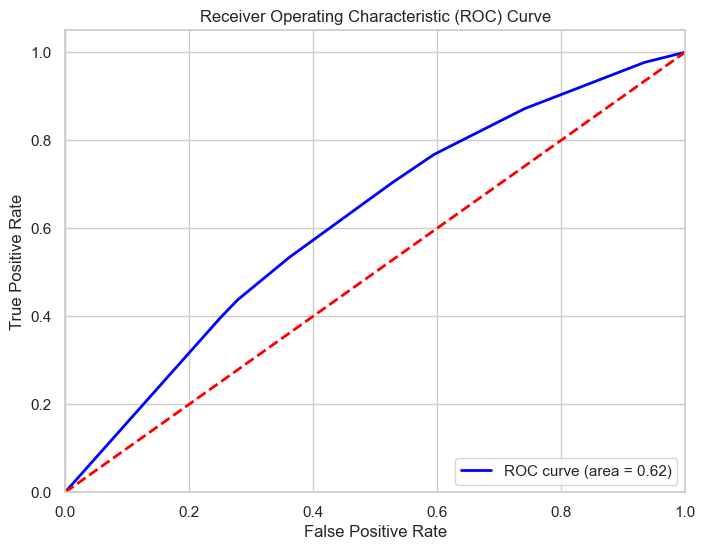

c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

GaussianNB
--------------------------------------------------
Train Score for GaussianNB:  0.8109063978655949
--------------------------------------------------
Test Score for GaussianNB:  0.8107379647499202
--------------------------------------------------
Confusion Matrix for GaussianNB for test : 
 [[1578279       0]
 [ 368440       0]]
--------------------------------------------------
Classification Report for GaussianNB for test : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90   1578279
           1       0.00      0.00      0.00    368440

    accuracy                           0.81   1946719
   macro avg       0.41      0.50      0.45   1946719
weighted avg       0.66      0.81      0.73   1946719

--------------------------------------------------


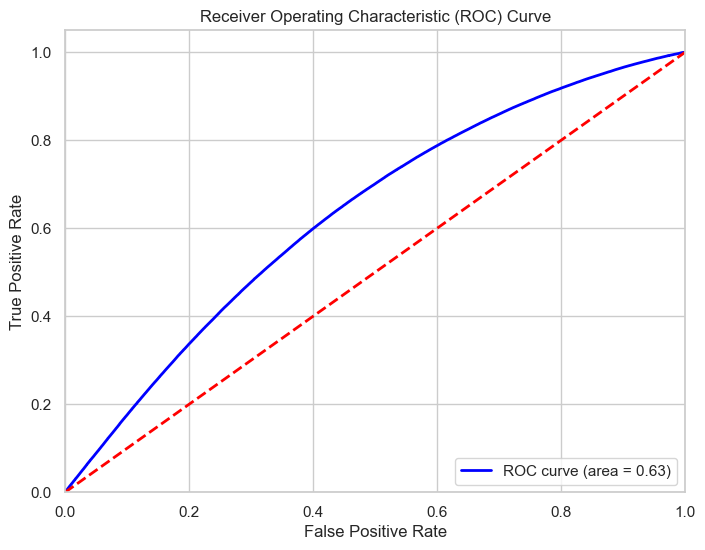

In [20]:
for model in models:
    train_model_and_print_accuracy(model, X_train, y_train, X_test, y_test)
    plot_roc_curve(model, X_test, y_test)